# Imports

In [8]:
import logging
import os
from pathlib import Path
import geopandas as gpd
import numpy as np

from multiview_mapping_toolkit.segmentation import (
    write_chips,
)
from multiview_mapping_toolkit.utils.visualization import show_segmentation_labels

# Define constants 

In [9]:
TRAINING_SITE = "valley"

In [10]:
IDs_TO_LABELS = {
    0: "ABCO",
    1: "CADE",
    2: "PILA",
    3: "PIPO",
    4: "PSME",
    5: "QUEV",
    6: "SNAG",
    7: "ground",
}

# Project root
PROJECT_ROOT = Path(os.path.abspath(""), "..", "..", "..").resolve()
# Input files
VECTOR_LABEL_FILENAME = Path(
    PROJECT_ROOT, "field_ref", "crowns_drone_w_field_data.geojson"
)
TRAINING_RASTER_FILENAME = Path(
    PROJECT_ROOT,
    "per_site_processing",
    TRAINING_SITE,
    "02_photogrammetry",
    "exports",
    "orthos",
    f"{TRAINING_SITE}.tif",
)

CLASS_COLUMN = "species_observed"
CHIP_SIZE = 3648
TRAINING_STRIDE = int(CHIP_SIZE / 2)
INFERENCE_STRIDE = int(CHIP_SIZE / 2)
TRAINING_IMGS_EXT = ".png"
TEST_IMGS_EXT = TRAINING_IMGS_EXT

TRAINING_CHIPS_FOLDER = Path(
    PROJECT_ROOT,
    "per_site_processing",
    TRAINING_SITE,
    "03_training_data",
    f"ortho_chipped_images_{TRAINING_SITE}",
)

In [11]:
logging.basicConfig(level="INFO")

['ABCO', 'CADE', 'PILA', 'PIPO', 'PSME', 'QUEV', 'SNAG']

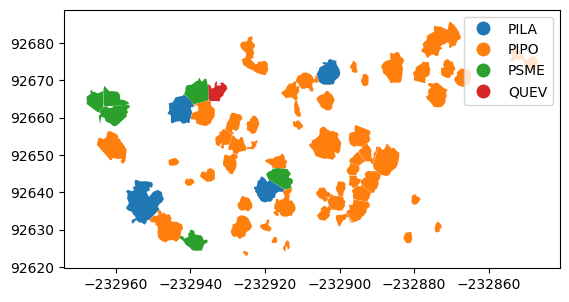

In [12]:
# Load the data
gdf = gpd.read_file(VECTOR_LABEL_FILENAME)

gdf.query(f"fire=='{TRAINING_SITE}'").plot(CLASS_COLUMN, legend=True, vmin=0, vmax=9)
class_names = np.unique(gpd.read_file(VECTOR_LABEL_FILENAME)[CLASS_COLUMN]).tolist()
class_names

# Create training chips

In [13]:
# Interchange the keys and values
label_remap = {v: k for k, v in IDs_TO_LABELS.items()}

write_chips(
    raster_file=TRAINING_RASTER_FILENAME,
    output_folder=TRAINING_CHIPS_FOLDER,
    chip_size=CHIP_SIZE,
    chip_stride=TRAINING_STRIDE,
    label_vector_file=VECTOR_LABEL_FILENAME,
    label_column=CLASS_COLUMN,
    label_remap=label_remap,
    output_suffix=TRAINING_IMGS_EXT,
    ROI_file=VECTOR_LABEL_FILENAME,
)

Writing image chips and labels to /ofo-share/scratch-david/organized-str-disp-MVMT-experiments/per_site_processing/valley/03_training_data/ortho_chipped_images_valley: 100%|██████████| 1120/1120 [00:37<00:00, 29.92it/s] 


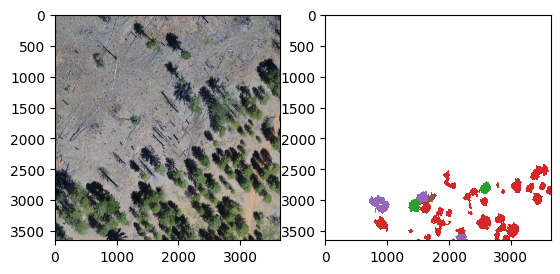

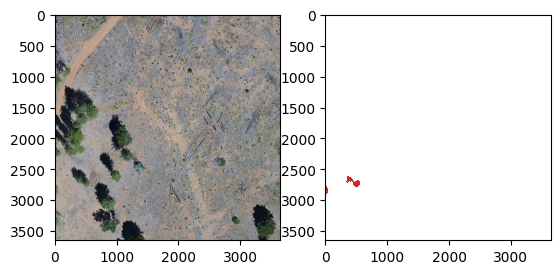

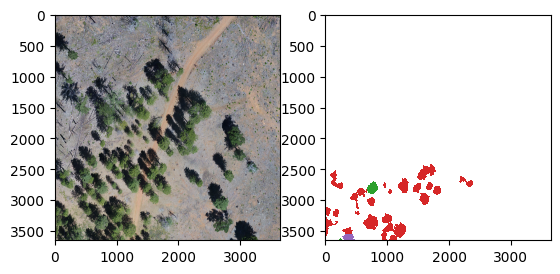

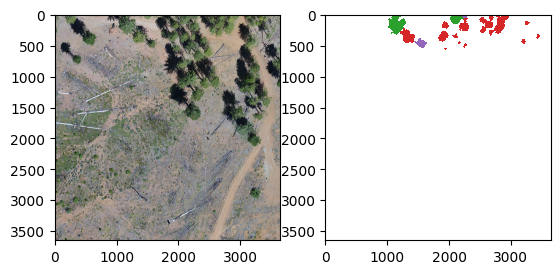

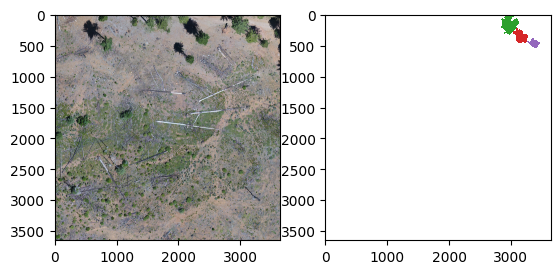

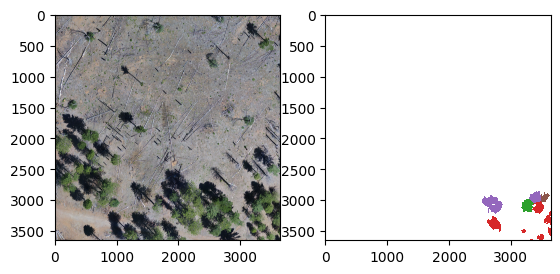

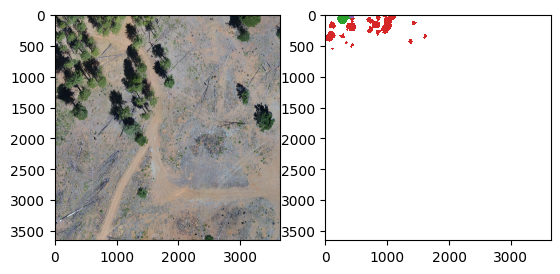

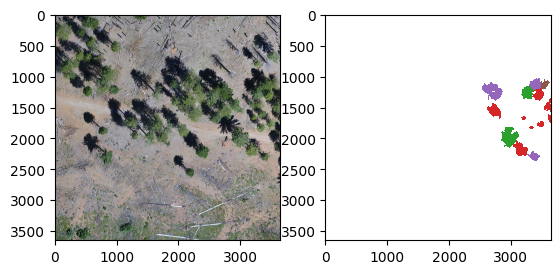

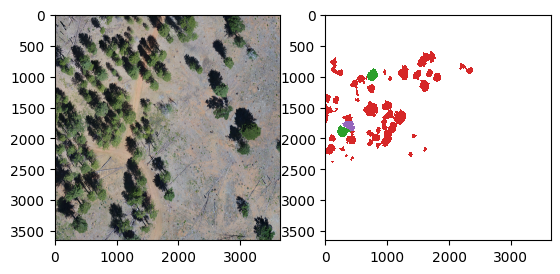

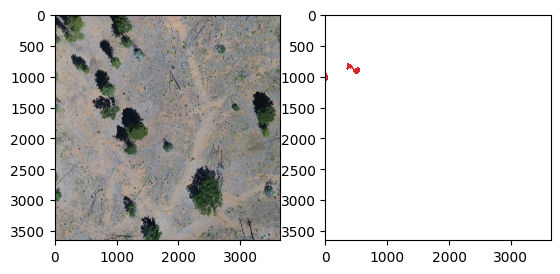

In [14]:
show_segmentation_labels(
    label_folder=Path(TRAINING_CHIPS_FOLDER, "anns"),
    image_folder=Path(TRAINING_CHIPS_FOLDER, "imgs"),
    image_suffix=TRAINING_IMGS_EXT,
)